Given
$ \displaystyle
    \frac{d^2 y}{d x^2} - k \frac{y}{1 + y} = 0
$
find $y$

# DARTS

$ \displaystyle
\overline{o}^{(i, j)}(x) = \sum_{o \in \mathcal{O}} \left( \alpha_o^{(i,j)} o(x) \right)
\\ \displaystyle
\forall (i, j) \; R = (\sum_{o \in \mathcal{O}} \alpha_o^{(i, j)} - 1)^2
$

# Code

In [7]:
import sympy as sp
from jax import random
from jax import config as jax_config
import jax.numpy as np

jax_config.update('jax_platform_name', 'cpu')

# !rm /etc/localtime
# !ln -s /usr/share/zoneinfo/Europe/Vilnius /etc/localtime

from util.plot import Plotting
from util.print import a, d, pad, info
from util.dotdict import DotDict
from network import Network
from train import train

In [8]:
c1 = sp.symbols('c_1')
x_bounds = (0, 1)
c1_bounds = (10.0, 20.0)

In [9]:
loss_model_func = lambda model_y, x, model_d2y: sp.Pow(model_d2y - c1 * (model_y) / (1 + model_y), 2, evaluate=False)
loss_integration_func = lambda loss_model: (loss_model, (c1, *c1_bounds))

In [10]:
cell_count = 4
network = Network(
  loss_model_func,
  loss_integration_func,
  [
    lambda z: 0,
    lambda z: 1,
    lambda z: z,
    lambda z: 1 + z,
    lambda z: -z,
    lambda z: z*z,
    lambda z: z*z*z*z,
    lambda z: sp.exp(z),
    # lambda z: (sp.exp(z) + sp.exp(-z)) / 2,
    # lambda z: sp.sin(z),
    # lambda z: 1 / (1 + sp.exp(-z))
  ],
  cell_count,
  x_bounds,
  verbose=1
)

_, model_y, loss_and_grad, _ = network.get_model()

17:44:06.563 [INFO] Constructed symbolic model
17:44:06.594 [INFO] Integrated
17:44:06.965 [INFO] Added boundary condition
17:44:07.500 [INFO] Lambdified
17:44:07.501 [INFO] Constructed JAXified model


In [11]:
def orig_func_klow(x, sigma_sq):
  S_0 = 1
  d = 1
  alpha = np.sqrt(sigma_sq) / d
  return S_0 * np.cosh(alpha * x) / np.cosh(alpha * d)

def orig_func_khi(x, sigma_sq):
  S_0 = 1
  d = 1

  # typical ks
  k1 = 10 ** 7
  kneg1 = 500
  k2 = 500

  K_M = (kneg1 + k2)/k1

  V_max_over_2_D_S = sigma_sq * K_M / (2*d*d)
  return S_0 + V_max_over_2_D_S * (x * x - d * d)

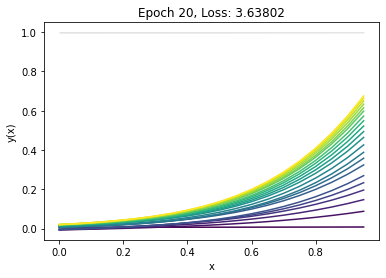

17:44:11.387 [INFO] W = [ 0.0234,  0.0237,  0.0234,  0.0232,  0.0230,  0.0244,  0.0250,  0.0240,  0.0235,  0.0233,  0.0241,  0.0241,  0.0231,  0.0237,  0.0244,  0.0237,  0.0138, -0.0146,  0.0106, -0.0193,  0.0191,  0.1317,  0.4882,  0.1020,  0.0231,  0.0231,  0.0238,  0.0240,  0.0233,  0.0237,  0.0233,  0.0236,  0.0245, -0.0048,  0.0296, -0.0001,  0.0188,  0.0268,  0.0251, -0.0000,  0.0251, -0.0046,  0.0287, -0.0007,  0.0208,  0.0272,  0.0252, -0.0001, -0.0408]
17:44:11.391 [INFO] Pruning weights...
17:44:11.399 [INFO] Shed 0.02304137870669365 weight
17:44:11.629 [INFO] Constructed symbolic model
17:44:11.664 [INFO] Integrated
17:44:12.230 [INFO] Added boundary condition
17:44:12.757 [INFO] Lambdified
17:44:12.757 [INFO] Constructed JAXified model


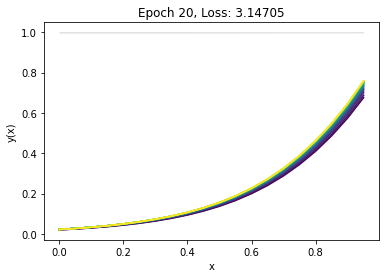

17:44:16.882 [INFO] W = [ 0.0233,  0.0234,  0.0238,  0.0234,  0.0251,  0.0268,  0.0249,  0.0422,  0.0417,  0.0434,  0.0432,  0.0412,  0.0434,  0.0453,  0.0437,  0.0191, -0.0172,  0.0204, -0.0175,  0.0200,  0.1501,  0.5389,  0.1046,  0.0419,  0.0417,  0.0427,  0.0427,  0.0419,  0.0426,  0.0421,  0.0424,  0.0456,  0.0016,  0.0512,  0.0014,  0.0392,  0.0489,  0.0462,  0.0016,  0.0460,  0.0016,  0.0481,  0.0002,  0.0433,  0.0494,  0.0467,  0.0002, -0.0617]
17:44:16.886 [INFO] Pruning weights...
17:44:17.000 [INFO] Shed 0.023277468979358673 weight
17:44:17.189 [INFO] Constructed symbolic model
17:44:17.224 [INFO] Integrated
17:44:17.545 [INFO] Added boundary condition
17:44:18.300 [INFO] Lambdified
17:44:18.400 [INFO] Constructed JAXified model


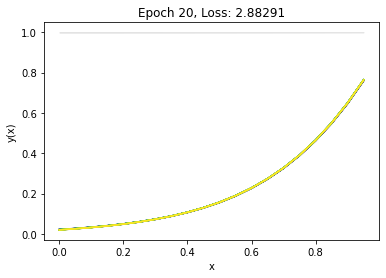

17:44:21.800 [INFO] W = [ 0.0228,  0.0236,  0.0226,  0.0246,  0.0254,  0.0235,  0.0575,  0.0559,  0.0578,  0.0565,  0.0573,  0.0572,  0.0573,  0.0558,  0.0236, -0.0143,  0.0272, -0.0122,  0.0221,  0.1535,  0.5329,  0.0950,  0.0573,  0.0559,  0.0578,  0.0567,  0.0576,  0.0578,  0.0574,  0.0563,  0.0638,  0.0055,  0.0683,  0.0041,  0.0587,  0.0668,  0.0644,  0.0041,  0.0644,  0.0056,  0.0616, -0.0000,  0.0666,  0.0651,  0.0631, -0.0000, -0.0760]
17:44:21.803 [INFO] Pruning weights...
17:44:21.912 [INFO] Shed 0.022550759837031364 weight
17:44:22.126 [INFO] Constructed symbolic model
17:44:22.164 [INFO] Integrated
17:44:22.673 [INFO] Added boundary condition
17:44:23.109 [INFO] Lambdified
17:44:23.109 [INFO] Constructed JAXified model


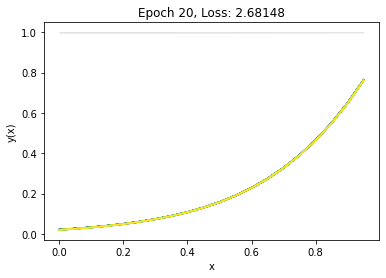

17:44:27.550 [INFO] W = [ 0.0221,  0.0230,  0.0235,  0.0226,  0.0211,  0.0704,  0.0667,  0.0685,  0.0652,  0.0724,  0.0664,  0.0614,  0.0611,  0.0279, -0.0099,  0.0330, -0.0064,  0.0250,  0.1570,  0.5231,  0.0860,  0.0699,  0.0665,  0.0699,  0.0667,  0.0708,  0.0703,  0.0701,  0.0662,  0.0797,  0.0086,  0.0832,  0.0063,  0.0754,  0.0824,  0.0802,  0.0061,  0.0807,  0.0091,  0.0721, -0.0000,  0.0885,  0.0770,  0.0741, -0.0000, -0.0888]
17:44:27.580 [INFO] Pruning weights...
17:44:27.159 [INFO] Shed 0.02112553082406521 weight
17:44:27.341 [INFO] Constructed symbolic model
17:44:27.378 [INFO] Integrated
17:44:27.833 [INFO] Added boundary condition
17:44:28.209 [INFO] Lambdified
17:44:28.210 [INFO] Constructed JAXified model


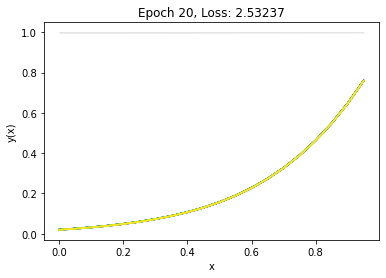

17:44:31.914 [INFO] W = [ 0.0214,  0.0224,  0.0225,  0.0196,  0.0816,  0.0756,  0.0770,  0.0712,  0.0863,  0.0729,  0.0610,  0.0629,  0.0320, -0.0046,  0.0373, -0.0008,  0.0287,  0.1613,  0.5168,  0.0780,  0.0804,  0.0746,  0.0799,  0.0744,  0.0818,  0.0807,  0.0806,  0.0738,  0.0935,  0.0109,  0.0966,  0.0082,  0.0897,  0.0960,  0.0940,  0.0079,  0.0951,  0.0121,  0.0811, -0.0000,  0.1085,  0.0870,  0.0820, -0.0001, -0.1003]
17:44:31.916 [INFO] Pruning weights...
17:44:32.140 [INFO] Shed 0.019566526636481285 weight
17:44:32.193 [INFO] Constructed symbolic model
17:44:32.231 [INFO] Integrated
17:44:32.588 [INFO] Added boundary condition
17:44:32.890 [INFO] Lambdified
17:44:32.890 [INFO] Constructed JAXified model


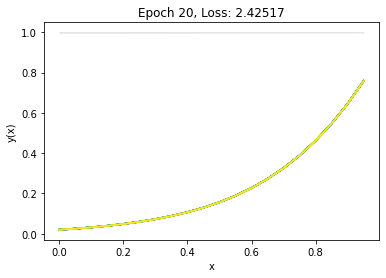

17:44:36.620 [INFO] W = [ 0.0207,  0.0220,  0.0216,  0.0915,  0.0832,  0.0842,  0.0761,  0.0990,  0.0780,  0.0583,  0.0633,  0.0357, -0.0000,  0.0412, -0.0000,  0.0322,  0.1653,  0.5129,  0.0720,  0.0892,  0.0811,  0.0885,  0.0806,  0.0907,  0.0894,  0.0893,  0.0800,  0.1055,  0.0134,  0.1084,  0.0104,  0.1019,  0.1080,  0.1061,  0.0101,  0.1080,  0.0154,  0.0892,  0.0001,  0.1262,  0.0960,  0.0885, -0.0000, -0.1099]
17:44:36.623 [INFO] Pruning weights...
17:44:36.746 [INFO] Shed 0.02068181149661541 weight
17:44:36.909 [INFO] Constructed symbolic model
17:44:36.946 [INFO] Integrated
17:44:37.295 [INFO] Added boundary condition
17:44:37.584 [INFO] Lambdified
17:44:37.584 [INFO] Constructed JAXified model


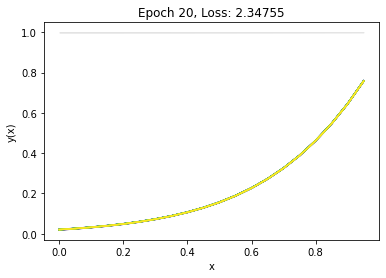

17:44:41.195 [INFO] W = [ 0.0214,  0.0206,  0.1004,  0.0898,  0.0903,  0.0800,  0.1107,  0.0820,  0.0539,  0.0626,  0.0392, -0.0000,  0.0449, -0.0000,  0.0355,  0.1687,  0.5098,  0.0677,  0.0965,  0.0861,  0.0956,  0.0855,  0.0982,  0.0967,  0.0966,  0.0849,  0.1159,  0.0162,  0.1188,  0.0133,  0.1123,  0.1184,  0.1164,  0.0130,  0.1196,  0.0194,  0.0967,  0.0001,  0.1417,  0.1039,  0.0937, -0.0000, -0.1174]
17:44:41.198 [INFO] Pruning weights...
17:44:41.304 [INFO] Shed 0.02060210332274437 weight
17:44:41.444 [INFO] Constructed symbolic model
17:44:41.483 [INFO] Integrated
17:44:41.699 [INFO] Added boundary condition
17:44:41.884 [INFO] Lambdified
17:44:41.884 [INFO] Constructed JAXified model


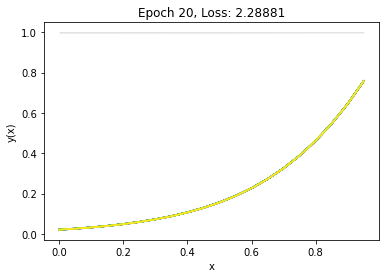

17:44:45.280 [INFO] W = [ 0.0210,  0.1084,  0.0958,  0.0959,  0.0836,  0.1211,  0.0856,  0.0495,  0.0620,  0.0425, -0.0000,  0.0484, -0.0000,  0.0387,  0.1715,  0.5084,  0.0640,  0.1025,  0.0902,  0.1016,  0.0895,  0.1043,  0.1028,  0.1027,  0.0889,  0.1248,  0.0185,  0.1277,  0.0155,  0.1212,  0.1273,  0.1254,  0.0152,  0.1298,  0.0230,  0.1033,  0.0001,  0.1557,  0.1111,  0.0986, -0.0000, -0.1241]
17:44:45.310 [INFO] Pruning weights...
17:44:45.100 [INFO] Shed 0.04950236529111862 weight
17:44:45.230 [INFO] Constructed symbolic model
17:44:45.267 [INFO] Integrated
17:44:45.418 [INFO] Added boundary condition
17:44:45.586 [INFO] Lambdified
17:44:45.586 [INFO] Constructed JAXified model


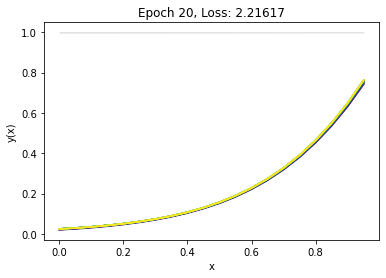

17:44:48.626 [INFO] W = [ 0.0211,  0.1083,  0.0951,  0.0968,  0.0839,  0.1199,  0.0887,  0.0659,  0.0453, -0.0000,  0.0491,  0.0001,  0.0437,  0.1693,  0.5305,  0.0589,  0.1076,  0.0946,  0.1067,  0.0939,  0.1094,  0.1079,  0.1077,  0.0934,  0.1325,  0.0209,  0.1353,  0.0179,  0.1290,  0.1350,  0.1331,  0.0176,  0.1388,  0.0267,  0.1088,  0.0005,  0.1682,  0.1184,  0.1090, -0.0000, -0.1293]
17:44:48.630 [INFO] Pruning weights...
17:44:48.707 [INFO] Shed 0.06587826460599899 weight
17:44:48.795 [INFO] Constructed symbolic model
17:44:48.821 [INFO] Integrated
17:44:48.948 [INFO] Added boundary condition
17:44:49.110 [INFO] Lambdified
17:44:49.111 [INFO] Constructed JAXified model


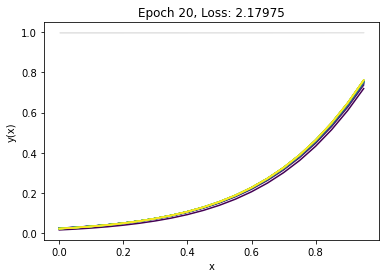

17:44:52.630 [INFO] W = [ 0.0215,  0.1082,  0.0948,  0.0978,  0.0846,  0.1188,  0.0900,  0.0474, -0.0000,  0.0562,  0.0015,  0.0406,  0.1724,  0.5462,  0.0625,  0.1117,  0.0985,  0.1109,  0.0978,  0.1135,  0.1120,  0.1119,  0.0973,  0.1392,  0.0219,  0.1421,  0.0190,  0.1355,  0.1417,  0.1397,  0.0187,  0.1467,  0.0289,  0.1144,  0.0004,  0.1783,  0.1256,  0.1172,  0.0000, -0.1350]
17:44:52.660 [INFO] Pruning weights...
17:44:52.141 [INFO] Shed 0.08458776772022247 weight
17:44:52.223 [INFO] Constructed symbolic model
17:44:52.252 [INFO] Integrated
17:44:52.378 [INFO] Added boundary condition
17:44:52.526 [INFO] Lambdified
17:44:52.526 [INFO] Constructed JAXified model


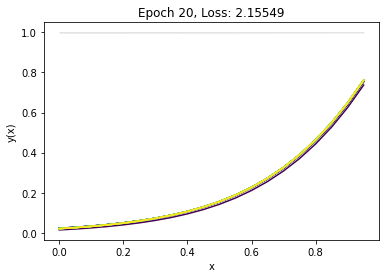

17:44:55.276 [INFO] W = [ 0.0217,  0.1082,  0.0944,  0.0981,  0.1185,  0.0901,  0.0490, -0.0000,  0.0625,  0.0033,  0.0376,  0.1731,  0.5508,  0.0640,  0.1151,  0.1015,  0.1143,  0.1008,  0.1169,  0.1154,  0.1153,  0.1003,  0.1449,  0.0231,  0.1480,  0.0203,  0.1412,  0.1474,  0.1455,  0.0200,  0.1536,  0.0313,  0.1194,  0.0008,  0.1872,  0.1317,  0.1240,  0.0000, -0.1395]
17:44:55.279 [INFO] Pruning weights...
17:44:55.364 [INFO] Shed 0.09010444581508636 weight
17:44:55.428 [INFO] Constructed symbolic model
17:44:55.456 [INFO] Integrated
17:44:55.586 [INFO] Added boundary condition
17:44:55.721 [INFO] Lambdified
17:44:55.721 [INFO] Constructed JAXified model


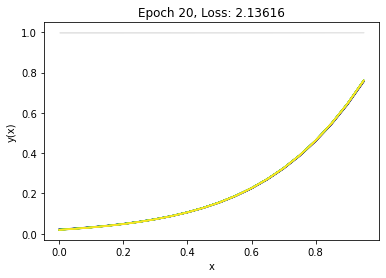

17:44:58.528 [INFO] W = [ 0.0219,  0.1082,  0.0940,  0.0983,  0.1183,  0.0504, -0.0000,  0.0670,  0.0034,  0.0358,  0.1730,  0.5541,  0.0634,  0.1179,  0.1039,  0.1171,  0.1033,  0.1197,  0.1182,  0.1181,  0.1027,  0.1499,  0.0237,  0.1531,  0.0210,  0.1461,  0.1525,  0.1505,  0.0207,  0.1596,  0.0329,  0.1236,  0.0006,  0.1950,  0.1370,  0.1299,  0.0001, -0.1440]
17:44:58.531 [INFO] Pruning weights...
17:44:58.629 [INFO] Shed 0.09399579465389252 weight
17:44:58.738 [INFO] Constructed symbolic model
17:44:58.769 [INFO] Integrated
17:44:58.887 [INFO] Added boundary condition
17:44:59.350 [INFO] Lambdified
17:44:59.360 [INFO] Constructed JAXified model


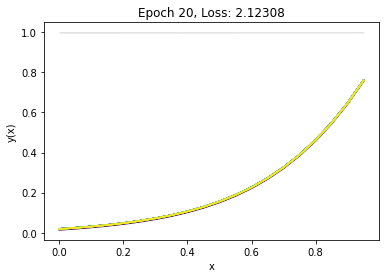

17:45:01.791 [INFO] W = [ 0.0220,  0.1082,  0.0984,  0.1183,  0.0517, -0.0000,  0.0702,  0.0034,  0.0354,  0.1714,  0.5551,  0.0617,  0.1202,  0.1061,  0.1194,  0.1054,  0.1220,  0.1205,  0.1204,  0.1049,  0.1543,  0.0249,  0.1574,  0.0222,  0.1504,  0.1568,  0.1548,  0.0219,  0.1649,  0.0351,  0.1278,  0.0018,  0.2013,  0.1419,  0.1351,  0.0010, -0.1471]
17:45:01.795 [INFO] Pruning weights...
17:45:01.868 [INFO] Shed 0.09835565835237503 weight
17:45:01.938 [INFO] Constructed symbolic model
17:45:01.968 [INFO] Integrated
17:45:02.940 [INFO] Added boundary condition
17:45:02.230 [INFO] Lambdified
17:45:02.230 [INFO] Constructed JAXified model


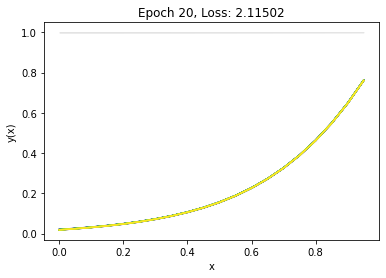

17:45:04.969 [INFO] W = [ 0.0221,  0.1082,  0.1181,  0.0530, -0.0000,  0.0737,  0.0039,  0.0344,  0.1698,  0.5553,  0.0603,  0.1221,  0.1077,  0.1213,  0.1071,  0.1239,  0.1224,  0.1223,  0.1065,  0.1580,  0.0256,  0.1612,  0.0230,  0.1541,  0.1605,  0.1586,  0.0227,  0.1695,  0.0366,  0.1312,  0.0021,  0.2071,  0.1460,  0.1396,  0.0010, -0.1501]
17:45:04.972 [INFO] Pruning weights...
17:45:05.460 [INFO] Shed 0.10823646932840347 weight
17:45:05.118 [INFO] Constructed symbolic model
17:45:05.149 [INFO] Integrated
17:45:05.202 [INFO] Added boundary condition
17:45:05.329 [INFO] Lambdified
17:45:05.329 [INFO] Constructed JAXified model


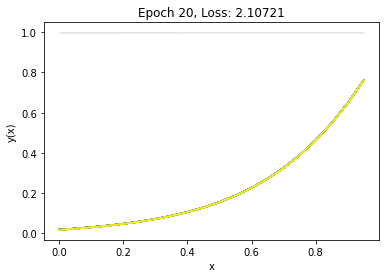

17:45:08.198 [INFO] W = [ 0.0222,  0.1179,  0.0542, -0.0000,  0.0767,  0.0042,  0.0339,  0.1683,  0.5560,  0.0589,  0.1237,  0.1090,  0.1228,  0.1084,  0.1254,  0.1239,  0.1238,  0.1078,  0.1613,  0.0262,  0.1645,  0.0236,  0.1573,  0.1638,  0.1618,  0.0233,  0.1735,  0.0379,  0.1341,  0.0023,  0.2122,  0.1495,  0.1435,  0.0010, -0.1528]
17:45:08.201 [INFO] Pruning weights...
17:45:08.256 [INFO] Shed -8.93359538167715e-06 weight
17:45:08.339 [INFO] Constructed symbolic model
17:45:08.371 [INFO] Integrated
17:45:08.447 [INFO] Added boundary condition
17:45:08.580 [INFO] Lambdified
17:45:08.580 [INFO] Constructed JAXified model


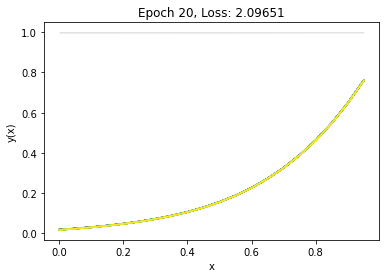

17:45:11.246 [INFO] W = [ 0.0223,  0.1177,  0.0543,  0.0787,  0.0039,  0.0320,  0.1663,  0.5563,  0.0576,  0.1250,  0.1101,  0.1241,  0.1094,  0.1267,  0.1252,  0.1251,  0.1088,  0.1641,  0.0267,  0.1674,  0.0242,  0.1601,  0.1666,  0.1646,  0.0239,  0.1769,  0.0391,  0.1367,  0.0026,  0.2166,  0.1526,  0.1469,  0.0010, -0.1551]
17:45:11.248 [INFO] Pruning weights...
17:45:11.323 [INFO] Shed 0.003888963023200631 weight
17:45:11.420 [INFO] Constructed symbolic model
17:45:11.450 [INFO] Integrated
17:45:11.522 [INFO] Added boundary condition
17:45:11.654 [INFO] Lambdified
17:45:11.655 [INFO] Constructed JAXified model


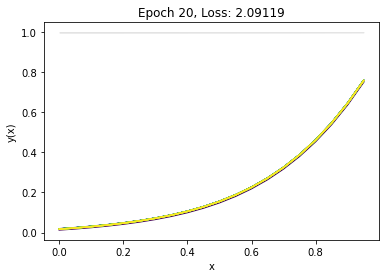

17:45:14.449 [INFO] W = [ 0.0225,  0.1175,  0.0543,  0.0812,  0.0294,  0.1648,  0.5564,  0.0578,  0.1260,  0.1109,  0.1252,  0.1102,  0.1277,  0.1263,  0.1262,  0.1097,  0.1665,  0.0275,  0.1698,  0.0250,  0.1624,  0.1690,  0.1670,  0.0247,  0.1800,  0.0405,  0.1388,  0.0032,  0.2204,  0.1552,  0.1499,  0.0014, -0.1567]
17:45:14.452 [INFO] Pruning weights...
17:45:14.538 [INFO] Shed 0.029406312853097916 weight
17:45:14.592 [INFO] Constructed symbolic model
17:45:14.622 [INFO] Integrated
17:45:14.696 [INFO] Added boundary condition
17:45:14.830 [INFO] Lambdified
17:45:14.831 [INFO] Constructed JAXified model


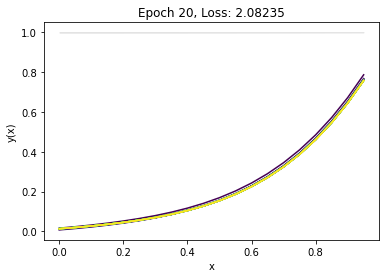

17:45:17.373 [INFO] W = [ 0.0220,  0.1175,  0.0547,  0.0748,  0.1587,  0.5608,  0.0471,  0.1269,  0.1120,  0.1260,  0.1113,  0.1286,  0.1271,  0.1270,  0.1108,  0.1686,  0.0283,  0.1718,  0.0257,  0.1647,  0.1711,  0.1691,  0.0254,  0.1825,  0.0418,  0.1418,  0.0048,  0.2227,  0.1581,  0.1525,  0.0032, -0.1580]
17:45:17.376 [INFO] Pruning weights...
17:45:17.460 [INFO] Shed 0.047082480043172836 weight
17:45:17.509 [INFO] Constructed symbolic model
17:45:17.539 [INFO] Integrated
17:45:17.623 [INFO] Added boundary condition
17:45:17.752 [INFO] Lambdified
17:45:17.752 [INFO] Constructed JAXified model


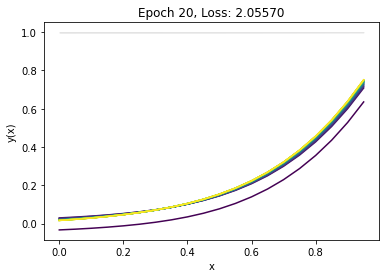

17:45:20.249 [INFO] W = [ 0.0254,  0.1165,  0.0534,  0.1127,  0.1904,  0.5624,  0.1277,  0.1110,  0.1268,  0.1104,  0.1294,  0.1279,  0.1278,  0.1099,  0.1698,  0.0356,  0.1740,  0.0339,  0.1650,  0.1723,  0.1704,  0.0336,  0.1843,  0.0496,  0.1412,  0.0103,  0.2268,  0.1581,  0.1539,  0.0076, -0.1519]
17:45:20.253 [INFO] Pruning weights...
17:45:20.329 [INFO] Shed 0.05339514836668968 weight
17:45:20.387 [INFO] Constructed symbolic model
17:45:20.417 [INFO] Integrated
17:45:20.468 [INFO] Added boundary condition
17:45:20.590 [INFO] Lambdified
17:45:20.590 [INFO] Constructed JAXified model


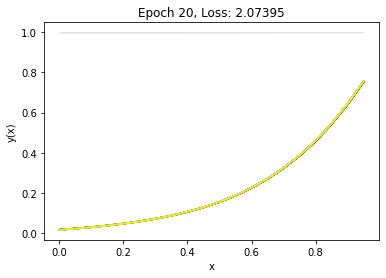

17:45:23.204 [INFO] W = [ 0.0256,  0.1164,  0.1154,  0.1917,  0.5652,  0.1284,  0.1115,  0.1275,  0.1109,  0.1301,  0.1286,  0.1285,  0.1103,  0.1709,  0.0357,  0.1751,  0.0340,  0.1660,  0.1734,  0.1715,  0.0337,  0.1860,  0.0503,  0.1422,  0.0102,  0.2291,  0.1594,  0.1555,  0.0074, -0.1529]
17:45:23.207 [INFO] Pruning weights...
17:45:23.293 [INFO] Shed 0.11543203890323639 weight
17:45:23.335 [INFO] Constructed symbolic model
17:45:23.364 [INFO] Integrated
17:45:23.435 [INFO] Added boundary condition
17:45:23.554 [INFO] Lambdified
17:45:23.555 [INFO] Constructed JAXified model


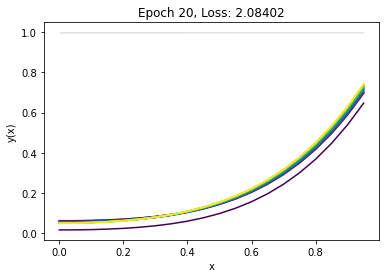

17:45:25.882 [INFO] W = [ 0.0391,  0.1150,  0.2800,  0.5360,  0.1292,  0.1064,  0.1284,  0.1058,  0.1308,  0.1294,  0.1293,  0.1053,  0.1712,  0.0440,  0.1794,  0.0463,  0.1623,  0.1738,  0.1718,  0.0460,  0.1873,  0.0596,  0.1328,  0.0088,  0.2412,  0.1540,  0.1558,  0.0020, -0.1450]
17:45:25.885 [INFO] Pruning weights...
17:45:25.964 [INFO] Shed 0.28003057837486267 weight
17:45:26.900 [INFO] Constructed symbolic model
17:45:26.430 [INFO] Integrated
17:45:26.120 [INFO] Added boundary condition
17:45:26.243 [INFO] Lambdified
17:45:26.244 [INFO] Constructed JAXified model


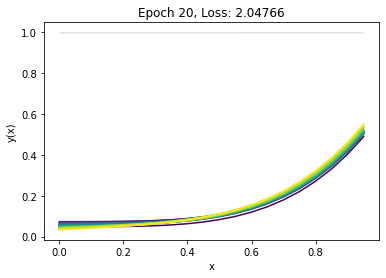

17:45:28.550 [INFO] W = [ 0.1395,  0.1908,  0.5285,  0.1310,  0.0856,  0.1228,  0.0777,  0.1400,  0.1306,  0.1311,  0.0767,  0.1699,  0.0522,  0.2200,  0.0965,  0.1190,  0.1763,  0.1704,  0.0982,  0.1899,  0.0718,  0.0739, -0.0313,  0.3053,  0.1298,  0.1560, -0.0506, -0.1354]
17:45:28.553 [INFO] Pruning weights...
17:45:28.624 [INFO] Shed 0.07673489302396774 weight
17:45:28.693 [INFO] Constructed symbolic model
17:45:28.721 [INFO] Integrated
17:45:28.832 [INFO] Added boundary condition
17:45:28.942 [INFO] Lambdified
17:45:28.943 [INFO] Constructed JAXified model


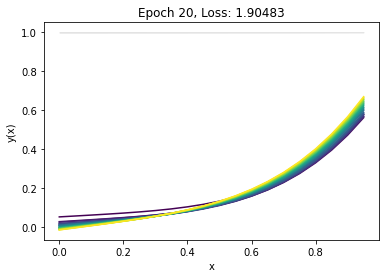

17:45:31.330 [INFO] W = [ 0.2211,  0.2734,  0.5713,  0.1314,  0.0813,  0.1083,  0.0585,  0.1553,  0.1280,  0.1315,  0.1668,  0.0398,  0.2524,  0.1195,  0.0806,  0.1804,  0.1674,  0.1249,  0.1950,  0.0675,  0.0340, -0.0677,  0.3553,  0.1324,  0.1611, -0.0882, -0.1447]
17:45:31.333 [INFO] Pruning weights...
17:45:31.408 [INFO] Shed 0.058469269424676895 weight
17:45:31.478 [INFO] Constructed symbolic model
17:45:31.504 [INFO] Integrated
17:45:31.598 [INFO] Added boundary condition
17:45:31.703 [INFO] Lambdified
17:45:31.703 [INFO] Constructed JAXified model


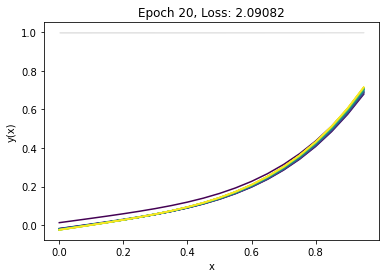

17:45:33.902 [INFO] W = [ 0.2417,  0.2928,  0.5938,  0.1313,  0.0837,  0.1038,  0.1597,  0.1260,  0.1314,  0.1639,  0.0275,  0.2571,  0.1148,  0.0701,  0.1812,  0.1646,  0.1222,  0.2002,  0.0633,  0.0293, -0.0691,  0.3706,  0.1418,  0.1662, -0.0876, -0.1542]
17:45:33.904 [INFO] Pruning weights...
17:45:33.985 [INFO] Shed 0.08365829288959503 weight
17:45:34.700 [INFO] Constructed symbolic model
17:45:34.990 [INFO] Integrated
17:45:34.211 [INFO] Added boundary condition
17:45:34.309 [INFO] Lambdified
17:45:34.309 [INFO] Constructed JAXified model


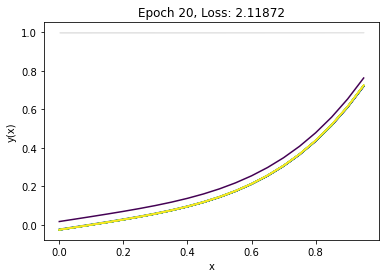

17:45:36.581 [INFO] W = [ 0.2484,  0.2991,  0.5974,  0.1314,  0.1023,  0.1613,  0.1247,  0.1315,  0.1621,  0.0144,  0.2569,  0.1034,  0.0667,  0.1819,  0.1628,  0.1121,  0.2048,  0.0566,  0.0321, -0.0648,  0.3769,  0.1503,  0.1709, -0.0815, -0.1654]
17:45:36.585 [INFO] Pruning weights...
17:45:36.661 [INFO] Shed 0.10229624807834625 weight
17:45:36.754 [INFO] Constructed symbolic model
17:45:36.784 [INFO] Integrated
17:45:36.892 [INFO] Added boundary condition
17:45:36.990 [INFO] Lambdified
17:45:36.991 [INFO] Constructed JAXified model


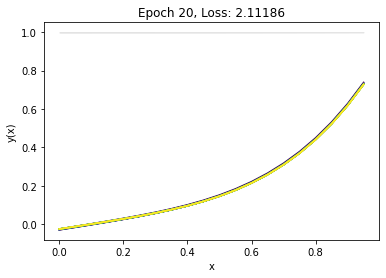

17:45:39.186 [INFO] W = [ 0.2496,  0.2997,  0.5978,  0.1314,  0.1615,  0.1237,  0.1315,  0.1610,  0.0082,  0.2548,  0.0961,  0.0665,  0.1826,  0.1616,  0.1059,  0.2082,  0.0549,  0.0370, -0.0521,  0.3786,  0.1569,  0.1743, -0.0674, -0.1705]
17:45:39.190 [INFO] Pruning weights...
17:45:39.271 [INFO] Shed 0.12372693419456482 weight
17:45:39.316 [INFO] Constructed symbolic model
17:45:39.349 [INFO] Integrated
17:45:39.451 [INFO] Added boundary condition
17:45:39.539 [INFO] Lambdified
17:45:39.539 [INFO] Constructed JAXified model


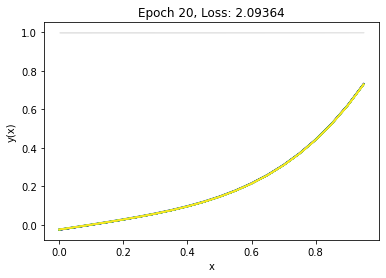

17:45:41.810 [INFO] W = [ 0.2547,  0.3033,  0.5956,  0.1314,  0.1624,  0.1316,  0.1602,  0.0029,  0.2544,  0.0912,  0.0654,  0.1840,  0.1609,  0.1021,  0.2105,  0.0527,  0.0389, -0.0420,  0.3814,  0.1631,  0.1766, -0.0555, -0.1750]
17:45:41.812 [INFO] Pruning weights...
17:45:41.890 [INFO] Shed 0.13136091828346252 weight
17:45:41.916 [INFO] Constructed symbolic model
17:45:41.952 [INFO] Integrated
17:45:41.973 [INFO] Added boundary condition
17:45:42.490 [INFO] Lambdified
17:45:42.490 [INFO] Constructed JAXified model


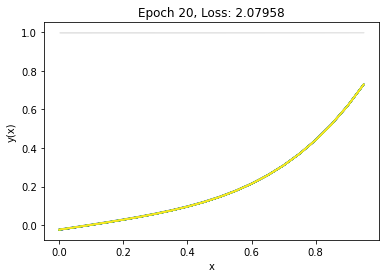

17:45:44.145 [INFO] W = [ 0.2609,  0.3080,  0.5946,  0.1636,  0.1316,  0.1598,  0.0001,  0.2547,  0.0869,  0.0642,  0.1858,  0.1605,  0.0990,  0.2120,  0.0495,  0.0394, -0.0334,  0.3840,  0.1687,  0.1781, -0.0452, -0.1798]
17:45:44.148 [INFO] Pruning weights...
17:45:44.225 [INFO] Shed 0.1315850168466568 weight
17:45:44.249 [INFO] Constructed symbolic model
17:45:44.287 [INFO] Integrated
17:45:44.348 [INFO] Added boundary condition
17:45:44.421 [INFO] Lambdified
17:45:44.421 [INFO] Constructed JAXified model


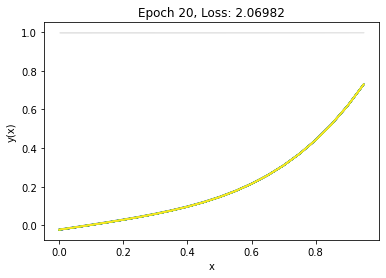

17:45:46.311 [INFO] W = [ 0.2670,  0.3129,  0.5934,  0.1648,  0.1596,  0.0001,  0.2553,  0.0824,  0.0633,  0.1879,  0.1603,  0.0958,  0.2129,  0.0454,  0.0393, -0.0257,  0.3860,  0.1738,  0.1790, -0.0356, -0.1847]
17:45:46.314 [INFO] Pruning weights...
17:45:46.368 [INFO] Shed 9.887447231449187e-05 weight
17:45:46.397 [INFO] Constructed symbolic model
17:45:46.440 [INFO] Integrated
17:45:46.461 [INFO] Added boundary condition
17:45:46.564 [INFO] Lambdified
17:45:46.565 [INFO] Constructed JAXified model


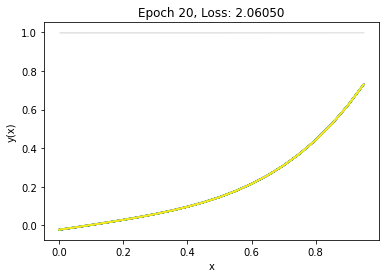

17:45:48.402 [INFO] W = [ 0.2729,  0.3177,  0.5926,  0.1661,  0.1597,  0.2561,  0.0784,  0.0626,  0.1904,  0.1604,  0.0930,  0.2133,  0.0410,  0.0388, -0.0183,  0.3873,  0.1784,  0.1794, -0.0264, -0.1896]
17:45:48.405 [INFO] Pruning weights...
17:45:48.481 [INFO] Shed 0.0626387670636177 weight
17:45:48.500 [INFO] Constructed symbolic model
17:45:48.538 [INFO] Integrated
17:45:48.563 [INFO] Added boundary condition
17:45:48.643 [INFO] Lambdified
17:45:48.644 [INFO] Constructed JAXified model


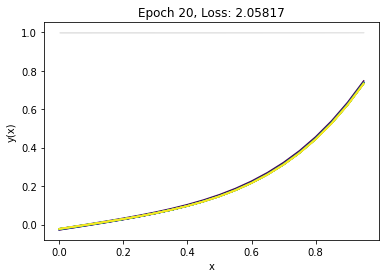

17:45:50.473 [INFO] W = [ 0.2718,  0.3169,  0.5936,  0.1659,  0.1600,  0.2538,  0.0711,  0.1923,  0.1606,  0.0867,  0.2132,  0.0359,  0.0420, -0.0072,  0.3838,  0.1812,  0.1793, -0.0140, -0.1945]
17:45:50.476 [INFO] Pruning weights...
17:45:50.552 [INFO] Shed 0.07109930366277695 weight
17:45:50.571 [INFO] Constructed symbolic model
17:45:50.611 [INFO] Integrated
17:45:50.634 [INFO] Added boundary condition
17:45:50.698 [INFO] Lambdified
17:45:50.699 [INFO] Constructed JAXified model


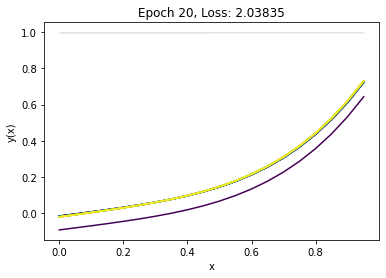

17:45:52.656 [INFO] W = [ 0.2856,  0.3284,  0.5901,  0.1691,  0.1593,  0.2581,  0.1947,  0.1600,  0.1079,  0.2119,  0.0498,  0.0341,  0.0003,  0.3890,  0.1853,  0.1779,  0.0004, -0.1793]
17:45:52.659 [INFO] Pruning weights...
17:45:52.735 [INFO] Shed 0.10790178179740906 weight
17:45:52.753 [INFO] Constructed symbolic model
17:45:52.788 [INFO] Integrated
17:45:52.812 [INFO] Added boundary condition
17:45:52.878 [INFO] Lambdified
17:45:52.879 [INFO] Constructed JAXified model


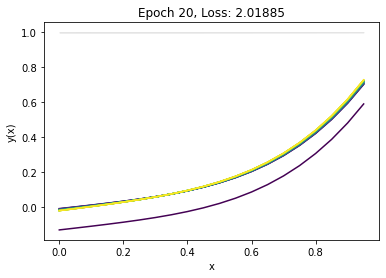

17:45:54.683 [INFO] W = [ 0.3096,  0.3534,  0.5850,  0.1766,  0.1590,  0.2721,  0.1996,  0.1596,  0.2088,  0.0850,  0.0121,  0.0165,  0.4048,  0.1912,  0.1747,  0.0208, -0.1410]
17:45:54.686 [INFO] Pruning weights...
17:45:54.762 [INFO] Shed 0.15897884964942932 weight
17:45:54.778 [INFO] Constructed symbolic model
17:45:54.818 [INFO] Integrated
17:45:54.827 [INFO] Added boundary condition
17:45:54.878 [INFO] Lambdified
17:45:54.879 [INFO] Constructed JAXified model


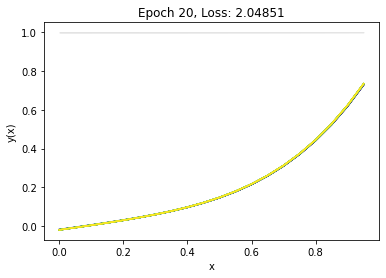

17:45:56.642 [INFO] W = [ 0.3138,  0.3579,  0.5877,  0.1780,  0.2721,  0.2021,  0.1596,  0.2060,  0.0836,  0.0093,  0.0151,  0.4021,  0.1929,  0.1720,  0.0212, -0.1396]
17:45:56.645 [INFO] Pruning weights...
17:45:56.720 [INFO] Shed 0.15958352386951447 weight
17:45:56.753 [INFO] Constructed symbolic model
17:45:56.785 [INFO] Integrated
17:45:56.807 [INFO] Added boundary condition
17:45:56.869 [INFO] Lambdified
17:45:56.870 [INFO] Constructed JAXified model


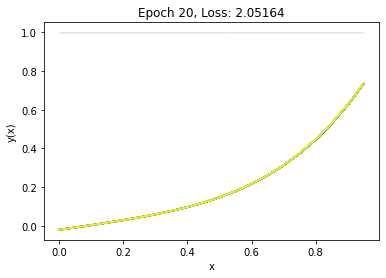

17:45:58.522 [INFO] W = [ 0.3161,  0.3604,  0.5893,  0.1787,  0.2709,  0.2043,  0.2035,  0.0818,  0.0084,  0.0149,  0.3980,  0.1943,  0.1696,  0.0227, -0.1389]
17:45:58.525 [INFO] Pruning weights...
17:45:58.614 [INFO] Shed 0.20433983206748962 weight
17:45:58.629 [INFO] Constructed symbolic model
17:45:58.668 [INFO] Integrated
17:45:58.690 [INFO] Added boundary condition
17:45:58.751 [INFO] Lambdified
17:45:58.752 [INFO] Constructed JAXified model


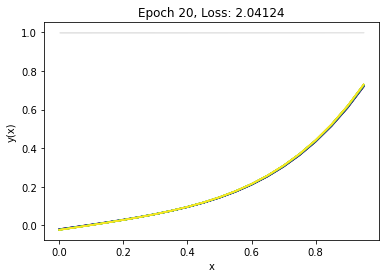

17:46:00.449 [INFO] W = [ 0.3206,  0.3706,  0.5909,  0.1820,  0.2740,  0.2013,  0.0817,  0.0020,  0.0107,  0.3999,  0.1989,  0.1674,  0.0214, -0.1368]
17:46:00.452 [INFO] Pruning weights...
17:46:00.509 [INFO] Shed 0.001999719999730587 weight
17:46:00.582 [INFO] Constructed symbolic model
17:46:00.612 [INFO] Integrated
17:46:00.627 [INFO] Added boundary condition
17:46:00.675 [INFO] Lambdified
17:46:00.675 [INFO] Constructed JAXified model


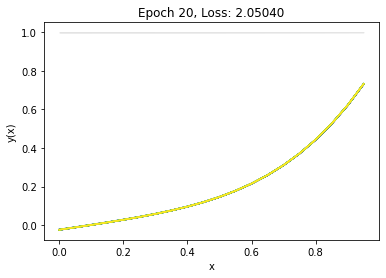

17:46:02.269 [INFO] W = [ 0.3204,  0.3744,  0.5918,  0.1832,  0.2730,  0.2012,  0.0805,  0.0108,  0.3985,  0.2038,  0.1674,  0.0236, -0.1379]
17:46:02.272 [INFO] Pruning weights...
17:46:02.331 [INFO] Shed 0.010816683992743492 weight
17:46:02.346 [INFO] Constructed symbolic model
17:46:02.399 [INFO] Integrated
17:46:02.424 [INFO] Added boundary condition
17:46:02.474 [INFO] Lambdified
17:46:02.475 [INFO] Constructed JAXified model


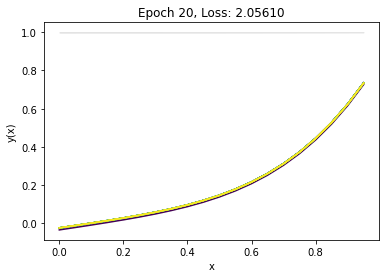

17:46:04.320 [INFO] W = [ 0.3188,  0.3760,  0.5920,  0.1837,  0.2708,  0.2010,  0.0825,  0.3953,  0.2078,  0.1672,  0.0303, -0.1358]
17:46:04.350 [INFO] Pruning weights...
17:46:04.960 [INFO] Shed 0.03028787486255169 weight
17:46:04.145 [INFO] Constructed symbolic model
17:46:04.178 [INFO] Integrated
17:46:04.199 [INFO] Added boundary condition
17:46:04.238 [INFO] Lambdified
17:46:04.239 [INFO] Constructed JAXified model


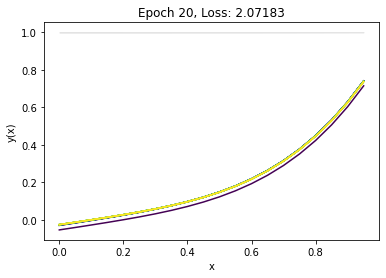

17:46:05.839 [INFO] W = [ 0.3142,  0.3727,  0.5939,  0.1827,  0.2660,  0.2008,  0.0965,  0.3885,  0.2101,  0.1670, -0.1214]
17:46:05.841 [INFO] Pruning weights...
17:46:05.899 [INFO] Shed 0.09654321521520615 weight
17:46:05.912 [INFO] Constructed symbolic model
17:46:05.948 [INFO] Integrated
17:46:05.961 [INFO] Added boundary condition
17:46:05.996 [INFO] Lambdified
17:46:05.996 [INFO] Constructed JAXified model


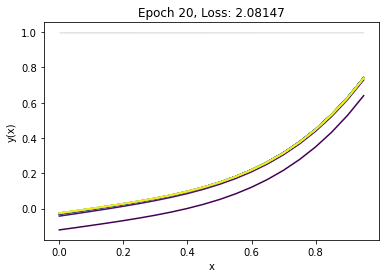

17:46:07.465 [INFO] W = [ 0.3151,  0.3749,  0.5943,  0.1834,  0.2666,  0.2006,  0.3891,  0.2115,  0.1668, -0.0256]
17:46:07.468 [INFO] Pruning weights...
17:46:07.526 [INFO] Shed 0.16683994233608246 weight
17:46:07.535 [INFO] Constructed symbolic model
17:46:07.571 [INFO] Integrated
17:46:07.587 [INFO] Added boundary condition
17:46:07.617 [INFO] Lambdified
17:46:07.617 [INFO] Constructed JAXified model


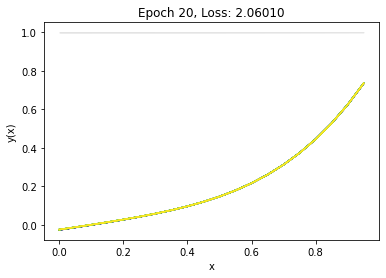

17:46:09.250 [INFO] W = [ 0.3119,  0.3742,  0.5983,  0.1831,  0.2630,  0.2006,  0.3842,  0.2152, -0.0241]
17:46:09.280 [INFO] Pruning weights...
17:46:09.900 [INFO] Shed 0.20063970983028412 weight
17:46:09.100 [INFO] Constructed symbolic model
17:46:09.138 [INFO] Integrated
17:46:09.141 [INFO] Added boundary condition
17:46:09.172 [INFO] Lambdified
17:46:09.176 [INFO] Constructed JAXified model


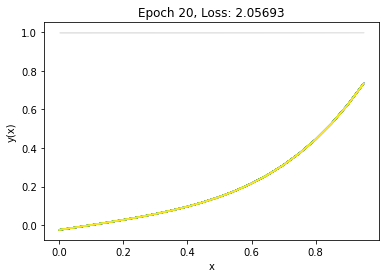

17:46:10.596 [INFO] W = [ 0.3105,  0.3759,  0.5979,  0.1837,  0.2609,  0.3813,  0.2195, -0.0236]
17:46:10.599 [INFO] Pruning weights...
17:46:10.604 [INFO] Shed 0.2194732278585434 weight
17:46:10.609 [INFO] Constructed symbolic model
17:46:10.655 [INFO] Integrated
17:46:10.669 [INFO] Added boundary condition
17:46:10.703 [INFO] Lambdified
17:46:10.704 [INFO] Constructed JAXified model


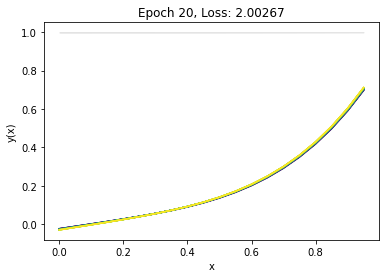

17:46:12.470 [INFO] W = [ 0.3225,  0.3897,  0.5997,  0.1880,  0.2721,  0.3969, -0.0290]
17:46:12.500 [INFO] Pruning weights...
17:46:12.800 [INFO] Constructed symbolic model
17:46:12.132 [INFO] Integrated
17:46:12.135 [INFO] Added boundary condition
17:46:12.159 [INFO] Lambdified
17:46:12.160 [INFO] Constructed JAXified model


Nothing more to prune!


In [12]:
plotting = Plotting(orig_func_khi, network, x_bounds, c1_bounds)

key = random.PRNGKey(7)

key, subkey = random.split(key)
W = random.uniform(subkey, shape=(len(network.alphas),), minval=0, maxval=0.001)

is_final = network.is_final

best = DotDict({"loss": np.inf})

if is_final:
    print('Network is final, no training')

while not is_final:
    plotting.funcs = []
    train_results = train(
        network,
        dataset = [(1, 1)],
        plotting = plotting,
        key = key,
        lr = 1e-5,
        lr_2 = 0.0003,
        epochs = 20,
        verbose = 0,
        batch_size = 16,
        W_init = W,
        best = best
    )

    W = train_results.W
    loss_history = train_results.loss_history

    info('Pruning weights...')
    network.assign_weights(W)
    W, model_y, loss_and_grad, is_final = network.prune_auto()

In [25]:
# for alpha in best.alphas:
#   d(alpha)

In [26]:
import re

for weight_sym, val in zip(best.alphas, best.W):
  weight = re.sub(r'a_o(\d)__0(\d)__0(\d)', r'\alpha_{o_\1}^{(\2, \3)}', weight_sym.name).replace('\x07', '\\a')
  print(f'${weight}$ & ', end='')
  val = round(float(val), 4)
  print(f'${val}$ \\\\')

$\alpha_{o_2}^{(0, 1)}$ & $0.0251$ \\
$\alpha_{o_4}^{(0, 2)}$ & $0.1166$ \\
$\alpha_{o_0}^{(0, 3)}$ & $0.054$ \\
$\alpha_{o_2}^{(0, 3)}$ & $0.1099$ \\
$\alpha_{o_5}^{(0, 3)}$ & $0.1879$ \\
$\alpha_{o_6}^{(0, 3)}$ & $0.56$ \\
$\alpha_{o_0}^{(1, 2)}$ & $0.1274$ \\
$\alpha_{o_1}^{(1, 2)}$ & $0.111$ \\
$\alpha_{o_2}^{(1, 2)}$ & $0.1266$ \\
$\alpha_{o_3}^{(1, 2)}$ & $0.1104$ \\
$\alpha_{o_4}^{(1, 2)}$ & $0.1291$ \\
$\alpha_{o_5}^{(1, 2)}$ & $0.1276$ \\
$\alpha_{o_6}^{(1, 2)}$ & $0.1275$ \\
$\alpha_{o_7}^{(1, 2)}$ & $0.1098$ \\
$\alpha_{o_0}^{(1, 3)}$ & $0.1694$ \\
$\alpha_{o_1}^{(1, 3)}$ & $0.0357$ \\
$\alpha_{o_2}^{(1, 3)}$ & $0.1734$ \\
$\alpha_{o_3}^{(1, 3)}$ & $0.0339$ \\
$\alpha_{o_4}^{(1, 3)}$ & $0.1646$ \\
$\alpha_{o_5}^{(1, 3)}$ & $0.1719$ \\
$\alpha_{o_6}^{(1, 3)}$ & $0.1699$ \\
$\alpha_{o_7}^{(1, 3)}$ & $0.0336$ \\
$\alpha_{o_0}^{(2, 3)}$ & $0.1837$ \\
$\alpha_{o_1}^{(2, 3)}$ & $0.0495$ \\
$\alpha_{o_2}^{(2, 3)}$ & $0.1411$ \\
$\alpha_{o_3}^{(2, 3)}$ & $0.0107$ \\
$\alpha_{o_4}^{(

In [27]:
float(best.loss)

1.1082913875579834

In [28]:
# y_prediction_last = model_y.subs(zip(network.alphas, W))
# y_prediction_last

In [29]:
y_prediction_best = best.model_y.subs(zip(best.alphas, best.W))
y_prediction_best

0.559994582601684*x**4 + 0.187962920599667*x**2 + 0.11935839572503*x + 0.000368218560399693*(2.29131403768922e-7*x**4 + 0.000363628759623082*x**2 - 0.514262143846239*x + 0.496010043484023*exp(0.0251127295196056*x) + 1)**4 + 0.00772696445404676*(2.29131403768922e-7*x**4 + 0.000363628759623082*x**2 - 0.514262143846239*x + 0.496010043484023*exp(0.0251127295196056*x) + 1)**2 + 0.025510901320589*exp(0.0251127295196056*x) + 0.0102351206552118*exp(5.07225176280998e-8*x**4 + 8.04960204785666e-5*x**2 - 0.113841534716086*x + 0.109801091253757*exp(0.0251127295196056*x)) - 0.0378412777270404

In [37]:
sp.latex(y_prediction_best)

'0.559994582601684 x^{4} + 0.187962920599667 x^{2} + 0.11935839572503 x + 0.000368218560399693 \\left(2.29131403768922 \\cdot 10^{-7} x^{4} + 0.000363628759623082 x^{2} - 0.514262143846239 x + 0.496010043484023 e^{0.0251127295196056 x} + 1\\right)^{4} + 0.00772696445404676 \\left(2.29131403768922 \\cdot 10^{-7} x^{4} + 0.000363628759623082 x^{2} - 0.514262143846239 x + 0.496010043484023 e^{0.0251127295196056 x} + 1\\right)^{2} + 0.025510901320589 e^{0.0251127295196056 x} + 0.0102351206552118 e^{5.07225176280998 \\cdot 10^{-8} x^{4} + 8.04960204785666 \\cdot 10^{-5} x^{2} - 0.113841534716086 x + 0.109801091253757 e^{0.0251127295196056 x}} - 0.0378412777270404'

In [31]:
# y_prediction_last_lambd = sp.lambdify([network.x], y_prediction_last, modules=network.lambdify_modules, cse=True)
y_prediction_best_lambd = sp.lambdify([network.x], y_prediction_best, modules=network.lambdify_modules, cse=True)

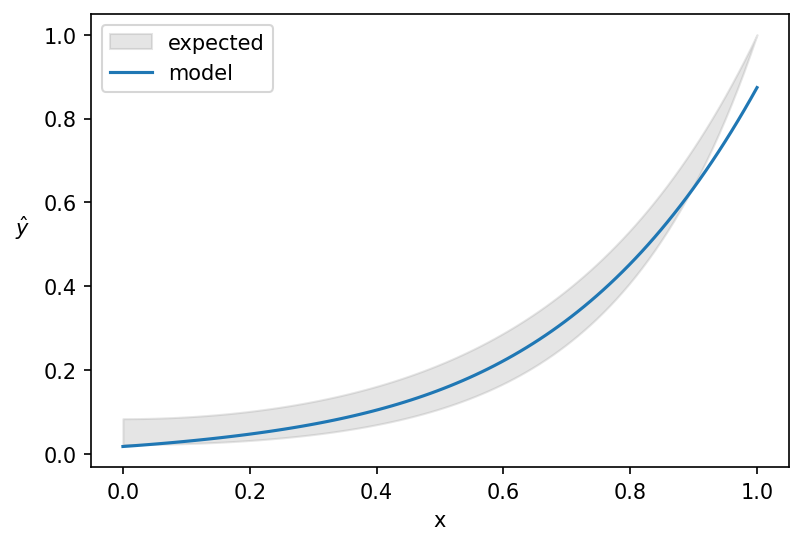

In [41]:
import matplotlib.pyplot as plt

xspace = np.linspace(*x_bounds, 100)

# plotting.show_c2varied_plot(plotting.actual_func, xspace, plotting.c2_bounds)
plotting.show_c2varied_plot(orig_func_klow, xspace, plotting.c2_bounds)
# plt.plot(xspace, y_prediction_last_lambd(xspace), color='tab:orange', label='model last')
plt.plot(xspace, y_prediction_best_lambd(xspace), color='tab:blue', label='model')
plt.legend(loc=2)
plt.gcf().set_dpi(150)
# plt.ylim((0.97, 1.02))
plt.xlabel('x')
plt.ylabel('$\hat{y}$', rotation=0, labelpad=10)
plt.show()

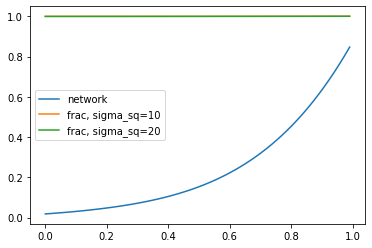

In [38]:
y_network_f = sp.lambdify(network.x, y_prediction_best)
x = np.arange(0, 1, 0.01)

y_network = y_network_f(x)
y_comp = orig_func_khi(x, 10)
y_comp2 = orig_func_khi(x, 20)

plt.plot(x, y_network, label='network')
plt.plot(x, y_comp, label='frac, sigma_sq=10')
plt.plot(x, y_comp2, label='frac, sigma_sq=20')
plt.legend()
plt.show()

In [34]:
def L2(y_pred, y_actual):
  return float(np.mean(np.square(np.array(y_pred) - np.array(y_actual))))

In [43]:
allsum = 0
for k in [1,  2,  3,  4,  5,  6,  7,  8,  9, 10]:
  val = L2(y_network_f(x), orig_func_klow(x, k))
  print(k, val+1, '- 1')
  allsum += val

allsum/10.0

1 1.2844357192516327 - 1
2 1.1528181284666061 - 1
3 1.0903427675366402 - 1
4 1.056632675230503 - 1
5 1.0368283540010452 - 1
6 1.0244859028607607 - 1
7 1.0164683070033789 - 1
8 1.011110533028841 - 1
9 1.007467260118574 - 1
10 1.0049720080569386 - 1


0.06855616555549204